<a href="https://colab.research.google.com/github/2403A51L41/Data-Mining-B52/blob/main/ADM_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)

In [9]:
data_with_outliers=np.concatenate((data,outliers))

In [10]:
df=pd.DataFrame(data_with_outliers,columns=['value'])

In [11]:
Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [12]:
outliers_iqr=df[(df['value']<lower_bound) | (df['value']>upper_bound)]

In [13]:
outlier_zscores=np.abs(stats.zscore(df['value']))
outliers_zscore=df[outlier_zscores>3]

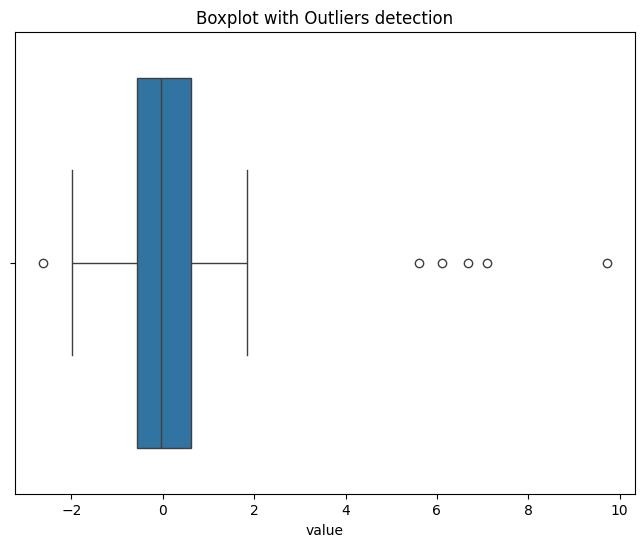

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['value'])
plt.title('Boxplot with Outliers detection')
plt.show()

In [22]:
df_capped = df.copy()
df_capped['value'] = np.clip(df_capped['value'], lower_bound, upper_bound)


In [24]:
df_removed = df.copy()
df_removed = df_removed[(df_removed['value'] >= lower_bound) &
(df_removed['value'] <= upper_bound)]


In [26]:
df_imputed = df.copy()
median_value = df['value'].median()
df_imputed['value'] = np.where((df_imputed['value'] < lower_bound) |
(df_imputed['value'] > upper_bound), median_value, df_imputed['value'])

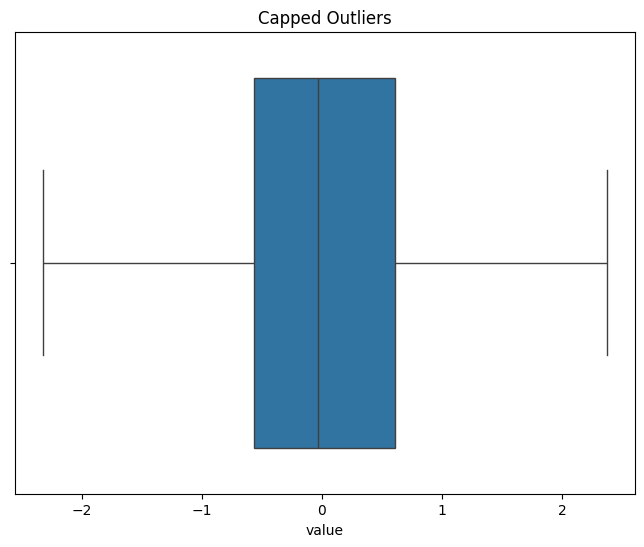

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['value'])
plt.title("Capped Outliers")
plt.show()

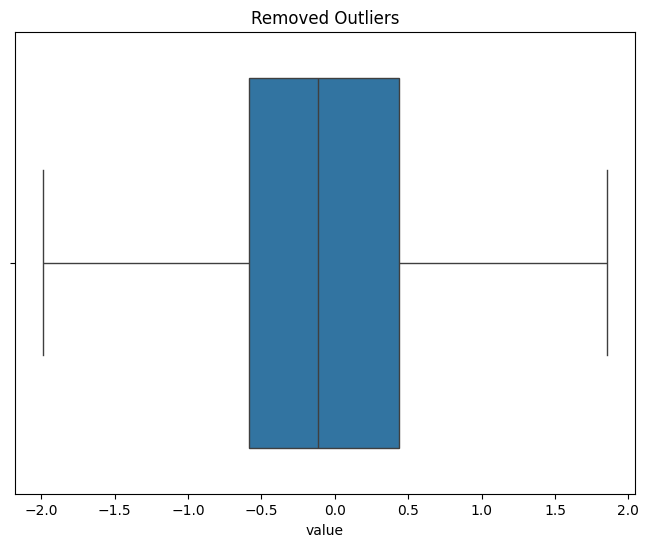

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['value'])
plt.title("Removed Outliers")
plt.show()


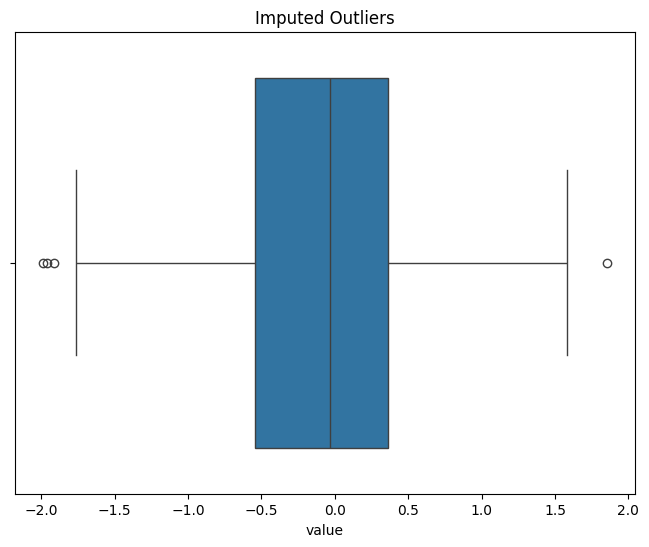

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['value'])
plt.title("Imputed Outliers")
plt.show()

In [33]:
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-Score:\n{outliers_zscore}")

Outliers detected using IQR:
        value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
Outliers detected using Z-Score:
        value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
